# 1) Problem Overview

Creating a machine learning model to predict the salary of new employees based on historical data will help to ensure fair and consistent compensation decisions. This will help in company's profit and it makes thier work easy.

# 2) Approach

 * Understanding the Data:
    Gathering data on past employees including features like College, City,	Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month).	  

 * Data Preparation:
    Cleaning the data (handle missing values and outliers):
   add dummy values in categorical columns

 * Model Selection and Training:
    Using regression models like Linear Regression, Random Forest, or Gradient Boosting Machines, XG Boost etc

 * Evaluation:
    Using cross-validation to ensure the model generalizes well.
    
    Evaluating performance on a separate test set using MAE, MSE, and R² Score.

# 3) Models used

    I have used Linear Regression, Ridge, Lasso, Decision tree regressor, Random forest, Gradient boost, XG boost and Bagging models to predict salary of new employee
    


# 4) Best model

     Among all the models, Bagging performs best with an R² score over 60% for both training and test data, and achieves 63% prediction accuracy.


# 5) Steps to improve model

* Hyperparameter Tuning: Optimize model parameters using Grid Search.

* Feature selection: Create and transform features to improve model input.

# Data importing and Preprocessing

In [1017]:
# importing numpy library for  mathematical or scientific calculation
import numpy as np

# importing pandas library for manipulating and analyzing data
import pandas as pd

# importing seaborn library for making statistical graphics 
import seaborn as sns

# importing matplotlib library to create visualizations
import matplotlib.pyplot as plt

In [1018]:
# importing all given csv file to dataframe

df = pd.read_csv('ML case Study.csv')

college = pd.read_csv('Colleges.csv')

cities = pd.read_csv('cities.csv')

In [1019]:
# To understand the data given we use df.head() which shows only first 5 rows by default

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [1020]:
# info() function help us to  know the total number of rows, data type which helps in knowing missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [1021]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [1022]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [1023]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [1024]:
# Extract data from the "Tier 1," "Tier 2," and "Tier 3" columns of the 'college' DataFrame
# and store them in separate lists 'Tier1,' 'Tier2,' and 'Tier3' for further analysis.

Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [1025]:
# Printing data contains in Tier1

Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [1026]:
# Assign tier values to colleges in the DataFrame based on their tier classification

for item in df.College:
    if item in Tier1:
        df["College"].replace(item,3,inplace=True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace=True)
    elif item in Tier3:
        df["College"].replace(item,1,inplace=True)

C:\Users\pc-1\AppData\Local\Temp\ipykernel_10960\2781525832.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["College"].replace(item,2,inplace=True)
C:\Users\pc-1\AppData\Local\Temp\ipykernel_10960\2781525832.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [1027]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,1,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,1,Ajmer,Executive,49010.0,2,81,33,82092.39
4,3,Durgapur,Executive,57879.0,4,74,32,73878.10


In [1028]:
# Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame

metro = cities['Metrio City'].tolist()
non_metro_cities = cities['non-metro cities'].tolist()

In [1029]:
# Repeating previpus steps and assigning value as 1 if city is merto and 0 if non metro

for item in df.City:
    if item in metro:
        df['City'].replace(item,1,inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item,0,inplace=True)

C:\Users\pc-1\AppData\Local\Temp\ipykernel_10960\2011105457.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].replace(item,0,inplace=True)
C:\Users\pc-1\AppData\Local\Temp\ipykernel_10960\2011105457.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [1030]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,1,0,Executive,60347.0,2,52,28,76764.02
3,1,0,Executive,49010.0,2,81,33,82092.39
4,3,0,Executive,57879.0,4,74,32,73878.10


# Creating dummy variables

In [1031]:
# get_dummies() function creates dummy variables from categorical variables

df = pd.get_dummies(df, dtype = int)

In [1032]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,1,0,60347.0,2,52,28,76764.02,1,0
3,1,0,49010.0,2,81,33,82092.39,1,0
4,3,0,57879.0,4,74,32,73878.10,1,0


In [1033]:
# df.shape provides number of rows x columns in dataframe

df.shape

(1589, 9)

In [1034]:
# df.describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


# Finding Outliers

<Axes: ylabel='Previous CTC'>

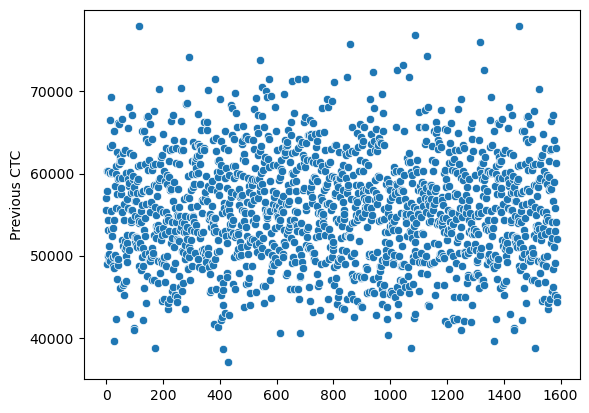

In [1035]:
# scatter plot helps us to find outliers for continues values

sns.scatterplot(df['Previous CTC'])

<Axes: ylabel='Graduation Marks'>

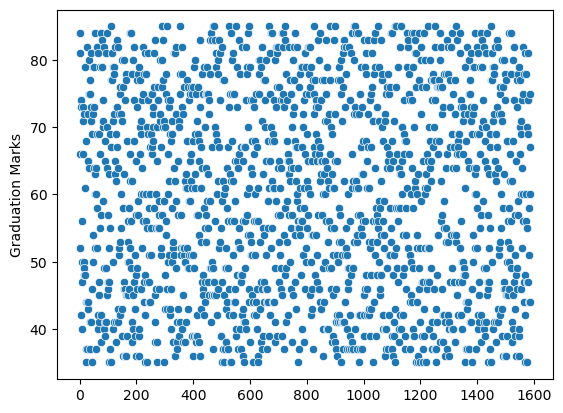

In [1036]:
sns.scatterplot(df['Graduation Marks'])

<Axes: ylabel='EXP (Month)'>

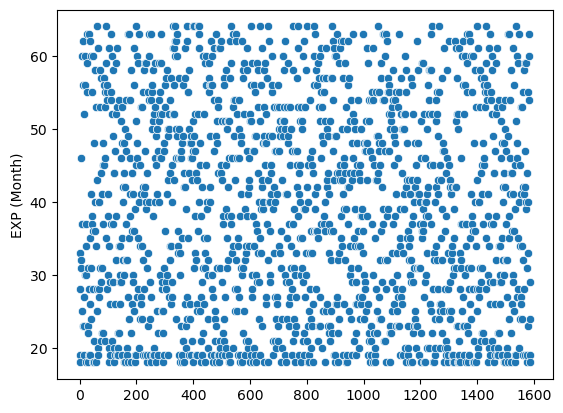

In [1037]:
sns.scatterplot(df['EXP (Month)'])

<Axes: ylabel='CTC'>

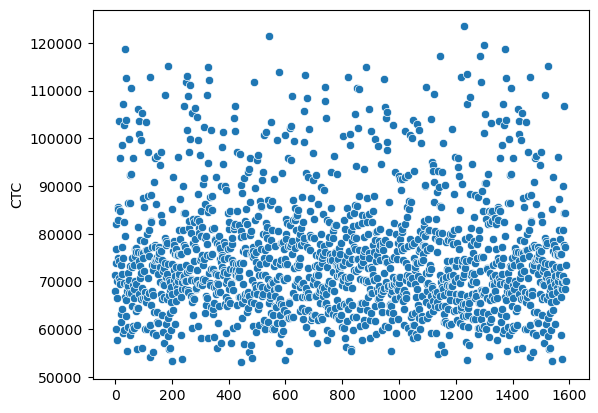

In [1038]:
sns.scatterplot(df['CTC'])

# Outliers handelling 

As there is outlier in CTC , we handel it so that our models work efficiently

In [1039]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,2.024544,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


In [1040]:
# Calculate the 25th (Q1) and 75th (Q3) percentiles for the 'CTC' column.

Q1 = df['CTC'].quantile(0.25)
Q3 = df['CTC'].quantile(0.75)

In [1041]:
print(Q1,Q3)

66902.35 80588.67


In [1042]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [1043]:
df['CTC'] = np.where(df['CTC'] > upper_bound, upper_bound, df['CTC'])
df['CTC'] = np.where(df['CTC'] < lower_bound, lower_bound, df['CTC'])

In [1044]:
Q1 = df['Previous CTC'].quantile(0.25)
Q3 = df['Previous CTC'].quantile(0.75)

In [1045]:
print(Q1,Q3)

50518.0 60109.0


In [1046]:
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [1047]:
df['Previous CTC'] = np.where(df['Previous CTC'] > upper_bound, upper_bound, df['Previous CTC'])
df['Previous CTC'] = np.where(df['Previous CTC'] < lower_bound, lower_bound, df['Previous CTC'])

In [1048]:
# Corelation between variables

df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
College,1.000000,0.014946,-0.042154,0.055060,-0.003539,-0.011752,0.025930,-0.014749,0.014749
City,0.014946,1.000000,0.003851,0.051670,-0.018616,-0.023613,-0.026940,0.048671,-0.048671
Previous CTC,-0.042154,0.003851,1.000000,0.006280,-0.032854,0.118746,0.246917,-0.012643,0.012643
Previous job change,0.055060,0.051670,0.006280,1.000000,0.019267,0.023488,0.009485,0.017150,-0.017150
Graduation Marks,-0.003539,-0.018616,-0.032854,0.019267,1.000000,-0.057061,-0.004665,-0.017858,0.017858
EXP (Month),-0.011752,-0.023613,0.118746,0.023488,-0.057061,1.000000,0.310451,0.026751,-0.026751
CTC,0.025930,-0.026940,0.246917,0.009485,-0.004665,0.310451,1.000000,-0.611024,0.611024
Role_Executive,-0.014749,0.048671,-0.012643,0.017150,-0.017858,0.026751,-0.611024,1.000000,-1.000000
Role_Manager,0.014749,-0.048671,0.012643,-0.017150,0.017858,-0.026751,0.611024,-1.000000,1.000000


# Train Test Split

In [1049]:
# Train test split Split arrays or matrices into random train and test subsets.

from sklearn.model_selection import train_test_split

In [1050]:
# # Split data into dependent and Independent Variable

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

In [1051]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [1052]:
y_test

1079     74059.06
405      84692.16
1492     75028.75
239      71001.53
610      62426.39
          ...    
1023     67435.46
700      62927.79
486      75143.25
672      60479.67
1303    101118.15
Name: CTC, Length: 318, dtype: float64

# Linear Regression

In [1053]:
# Importing all required models to train data

from sklearn.linear_model import LinearRegression,Ridge, Lasso

In [1054]:
# Create a LinearRegression model

lm = LinearRegression()

In [1055]:
# Fit the model to the training data

lm.fit(X_train, y_train)

LinearRegression()

In [1056]:
# getting coefficient values linear regression model

lm.coef_

array([ 4.58915663e+02,  2.88356828e+02,  3.71598093e-01, -2.80857448e+01,
        4.22153948e+00,  2.34129819e+02, -8.39025610e+03,  8.39025610e+03])

In [1057]:
# getting intercept value of linear regression model

lm.intercept_

48906.78944195534

In [1058]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coef'])
cdf

,Coef
College,458.915663
City,288.356828
Previous CTC,0.371598
Previous job change,-28.085745
Graduation Marks,4.221539
EXP (Month),234.129819
Role_Executive,-8390.256097
Role_Manager,8390.256097


In [1059]:
pd.DataFrame(lm.coef_, X.columns, columns = ['intercept'])

,intercept
College,458.915663
City,288.356828
Previous CTC,0.371598
Previous job change,-28.085745
Graduation Marks,4.221539
EXP (Month),234.129819
Role_Executive,-8390.256097
Role_Manager,8390.256097


In [1060]:
# Make prediction using test and train data sets

y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

Text(0.5, 1.0, 'Evaluation of out LM model')

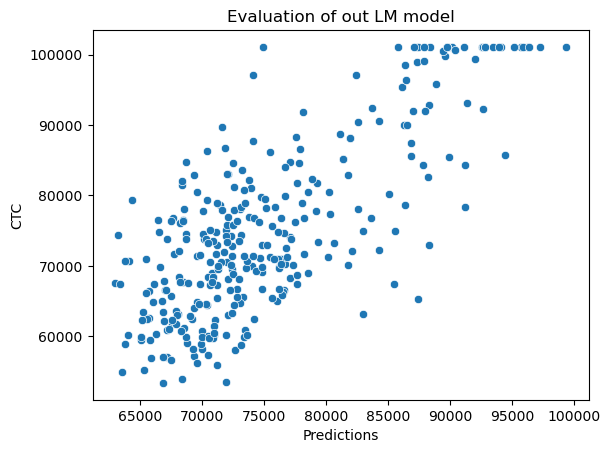

In [1061]:
# Visual representation of predictions

sns.scatterplot(x = y_test_pred, y = y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of out LM model")

In [1062]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [1063]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1064]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6793.741711332693
Mean Squared Error:  66013643.89960208
r2_score of train dataset: 0.50266
r2_score of test dataset: 0.57904


# Ridge 

In [1065]:
# importing Ridge Regression 

from sklearn import preprocessing

In [1066]:
# StandardScaler: Fits on training data to standardize features by removing the mean and scaling to unit variance.

scaler = preprocessing.StandardScaler().fit(X_train)

In [1067]:
# Transform X_train using the fitted scaler to standardize features for consistent model training.

X_train_s = scaler.transform(X_train)

In [1068]:
# Transform X_test using the fitted scaler to standardize features for consistent model training.

X_test_s = scaler.transform(X_test)

In [1069]:
# fitting into ridge model

lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [1070]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5790071870144989

In [1071]:
# Make prediction using test and train data sets

y_train_pred = lm_r.predict(X_train_s)
y_test_pred = lm_r.predict(X_test_s)

In [1072]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6794.194743711722
Mean Squared Error:  66019339.34691638
r2_score of train dataset: 0.50266
r2_score of test dataset: 0.57901


# Lasso

In [1073]:
# fitting data into lasso model

lm_r = Lasso(alpha = 0.4)
lm_r.fit(X_train_s, y_train)

Lasso(alpha=0.4)

In [1074]:
# Make prediction using test and train data sets

y_train_pred = lm_r.predict(X_train_s)
y_test_pred = lm_r.predict(X_test_s)

In [1075]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1076]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6793.856398249569
Mean Squared Error:  66014442.65411197
r2_score of train dataset: 0.50266
r2_score of test dataset: 0.57904


# Decision Tree

In [1077]:
# importing tree used to split data into subsets based on feature values to make predictions or classifications.

from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [1078]:
# fitting model on data sets

regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [1079]:
# Make prediction using test and train data sets

y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [1080]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1081]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6395.136258357102
Mean Squared Error:  65097378.135843374
r2_score of train dataset: 0.57546
r2_score of test dataset: 0.58489


# Random Forest

In [1082]:
# importing random forest an ensemble of decision trees that improves prediction accuracy and reduces overfitting by averaging multiple tree predictions.

from sklearn.ensemble import RandomForestRegressor

In [1083]:
# assigning max_depth value

rf_reg = RandomForestRegressor(max_depth = 3)

In [1084]:
# fitting model on data sets

rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3)

In [1085]:
# Making prediction using test and train data sets

y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

In [1086]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1087]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6279.724730382651
Mean Squared Error:  63287480.30216339
r2_score of train dataset: 0.58975
r2_score of test dataset: 0.59643


# Bagging

In [1088]:
# importing Bagging Regressor an ensemble method that trains multiple instances of a regressor on different subsets of the data and averages their predictions to improve accuracy and reduce variance.

from sklearn.ensemble import BaggingRegressor

In [1089]:
# BaggingRegressor: Creates an ensemble of 1000 regressors with bootstrapped samples, using all available CPU cores for parallel processing, and a fixed random seed for reproducibility.

bag_reg = BaggingRegressor(bootstrap=True, n_jobs=-1, n_estimators=1000, random_state=42)

In [1090]:
# fitting model on data sets

bag_reg.fit(X_train, y_train)

BaggingRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [1091]:
# Making prediction using test and train data sets

y_train_pred = bag_reg.predict(X_train)
y_test_pred = bag_reg.predict(X_test)

In [1092]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1093]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  5914.72468716982
Mean Squared Error:  57975984.395395145
r2_score of train dataset: 0.94627
r2_score of test dataset: 0.6303


Hyperparameter Tuning is performed on bagging because it has best r_2 score.

# Grid Search

In [1094]:
# importing Grid Search which Finds the best hyperparameters through systematic exploration and cross-validation.

from sklearn.model_selection import GridSearchCV

In [1095]:
# assigning grid parameters

param_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}

In [1096]:
# GridSearchCV: Tunes BaggingRegressor hyperparameters using 5-fold cross-validation and negative MSE.

grid_search = GridSearchCV(estimator=bag_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [1097]:
# fitting model on data sets 

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(n_estimators=1000, n_jobs=-1,
                                        random_state=42),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [1098]:
# Making prediction using test and train data sets

y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

In [1119]:
grid_search.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 30}

In [1099]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1100]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  5969.78286687631
Mean Squared Error:  59690553.240977176
r2_score of train dataset: 0.93862
r2_score of test dataset: 0.61936


# Gradient Boost

In [1101]:
# Import GradientBoostingRegressor for boosting models with gradient descent.

from sklearn.ensemble import GradientBoostingRegressor

In [1102]:
gb = GradientBoostingRegressor()

In [1103]:
# fitting data sets into model

gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [1104]:
# Making prediction using test and train data sets

y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [1105]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1106]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6187.784090710719
Mean Squared Error:  61994227.895316
r2_score of train dataset: 0.69063
r2_score of test dataset: 0.60467


# Ada Boost

In [1107]:
# Import AdaBoostRegressor for boosting models using adaptive boosting.

from sklearn.ensemble import AdaBoostRegressor

In [1108]:
# assigning parameters

ada = AdaBoostRegressor(learning_rate = 0.02, n_estimators = 5000)

In [1109]:
# fitting models on data set

ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.02, n_estimators=5000)

In [1110]:
# Making prediction using test and train data sets

y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

In [1111]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1112]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  6530.992383461512
Mean Squared Error:  65140078.82355218
r2_score of train dataset: 0.58355
r2_score of test dataset: 0.58461


# XG Boost

In [1113]:
# Import XGBRegressor for gradient boosting with XGBoost, known for its efficiency and performance.

import xgboost as xgb

In [1114]:
# assigning parameters

xgb_r = xgb.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 1000, seed = 123) 

In [1115]:
# fitting models on data set

xgb_r.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:35:05] WARNING: D:\bld\xgboost-split_1722454234704\work\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [1116]:
# Making prediction using test and train data sets

y_train_pred = xgb_r.predict(X_train)
y_test_pred = xgb_r.predict(X_test)

In [1117]:
# MSE: Measures average squared prediction error; sensitive to outliers.
# R²: Proportion of variance explained by the model; higher is better.
# MAE: Measures average absolute prediction error; robust to outliers.

In [1118]:
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_test_pred))
print("r2_score of train dataset:",round(r2_score(y_train,y_train_pred),5))
print("r2_score of test dataset:",round(r2_score(y_test,y_test_pred),5))

Mean Absolute Error:  5904.1487897995285
Mean Squared Error:  64022907.180991456
r2_score of train dataset: 1.0
r2_score of test dataset: 0.59174


# Conclusion

By considering r_2 score value lets compare model accuracy

* XG Boost: 0.59174

* Ada Boost: 0.58459

* Gradient Boost: 0.60472

* Bagging: 0.63030

* Random Forest: 0.59804

* Decision Tree: 0.58489

* Ridge: 0.57901

* Lasso: 0.57904

* Linear Regression: 0.57904
